# Project: No Show Appointment DATA

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **I would be investigating a dataset collected on medical appointments in Brazil.**.

> **The column names of my dataset and their description are listed below:**

    PatientID------- Patient's identity number

    AppointmentID--- Patient's appointment number
   
    Gender---------- Patient's Gender ("M" for Male, "F" for Female)
   
    ScheduledDay---- The date and time patients booked their appointment
   
    AppointmentDay-- The date and time patients were to show up for their appointment
   
    Age------------- Patient's age
   
    Neighbourhood--- Location of the hospital
    
    Scholarship----- Whether or not a patient is enrolled in Brasilian welfare program (0= No, 1= Yes)
   
    Hipertension---- Whether or not the patient is hypertensive (0= No, 1=Yes)
   
    Diabetes-------- Whether or not the patient is diabetic (0= No, 1=Yes)
   
    Alcoholism------ Whether or not the patient consumes alcohol (0= No, 1=Yes)
   
    Handcap--------- Whether or not the patient is handicapped (0= No, 1=Yes)
   
    SMS_received---- Whether or not the patient recieved SMS notification (0= No, 1=Yes)
   
    No-show--------- Whether or not the patient showed up for their appointment ("No"= Showed Up, "Yes"= Did Not Show Up)
       
       
### Question(s) for Analysis
The following questions were addressed:
1. What is the age distribution of patients?
2. What is the distribution of patients by hospital location?
3. What is the distribution of patients by the day they booked their appointment
4. What is the distribution of patients by their appointment dates
5. What is the distribution of patients that showed up and did not show up for appointments based on the following factors: age, whether or not they are diabetic, gender, whether or not they are enrolled in the welfare program, whether or not they are hypertensive, hospital location, whether or not they take alcohol, whether or not they recieved sms notifications
6. Does waiting time between scheduling and appointment day predict whether a patient will come for appointment
7. What day of the week has the highest and lowest appointment show ups and the highest and lowest failed appointment show ups
8. Are there any patients who have both diabetes and hypertension? If yes, what is the age  distribution of patients that showed up and those that did not show up for their appointment?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling and Cleaning

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#loading csv file
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.shape
df.head()

(110527, 14)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


    Observation: Original dataset has 110527 rows, and 14 columns

In [5]:
#getting descriptive statistics of dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


    Observation: 25% of patients are less than 18years, 50% are less than 37 years, 75% are less than 55 years, and the maximum age is 115. 
    Errors exist in some column names

In [6]:
#Fixing column name error
df.columns=['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap','sms_received', 'no_show']
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
#getting summary of the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


    Observations: patient_id data type should be int
    scheduled_day and appointment_day data types should be datetime
    

In [8]:
#Fixing data type of patient_id
df['patient_id']=df['patient_id'].apply(np.int64)
df['patient_id'].dtypes

dtype('int64')

In [9]:
#Fixing data type of scheduled_day
df['scheduled_day']=pd.to_datetime(df['scheduled_day']).dt.date.astype('datetime64[ns]')
df['scheduled_day'].dtypes

dtype('<M8[ns]')

In [10]:
#Fixing data type of appointment_day
df['appointment_day']=pd.to_datetime(df['appointment_day']).dt.date.astype('datetime64[ns]')
df['appointment_day'].dtypes

dtype('<M8[ns]')

In [11]:
#checking if all dtypes are correct
df.dtypes

patient_id                  int64
appointment_id              int64
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                    object
dtype: object

    Observation: all data types are now correct

In [12]:
#checking for duplicates
df.duplicated().sum()

0

    Observation: No duplicates

In [13]:
#checking for missing values
df.isnull().sum()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
dtype: int64

    Observation: No missing values

#### Investigating unique values and value counts of individual columns

In [14]:
#generating unique values and counts of patient_id
df['patient_id'].unique()
df['patient_id'].value_counts()

array([ 29872499824296, 558997776694438,   4262962299951, ...,
        72633149253362, 996997666245785,  15576631729893])

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
75797461494159     62
258424392677       62
871374938638855    62
66844879846766     57
872278549442       55
89239687393655     54
8435223536         51
853439686798559    50
14479974122994     46
65433599726992     46
81894521843749     42
9452745294842      42
188232341789524    40
2271579924275      38
9496196639835      38
13364929297498     37
1484143378533      35
986162815579582    34
88834999836575     34
712458866975343    33
6128878448536      30
416755661551767    30
81213966782532     29
8634164126317      24
36994987339512     23
                   ..
98683352133221      1
5394313945329       1
48689197872217      1
9675119787546       1
763619586595        1
867726299814126     1
77425139319169      1
39423418767468      1
961392519656997     1
737858311826761     1
271517596623238     1
8249496395977       1
137479426839        1
6529316371746       1
3212962263

    Observation: some patients booked multiple appointments over the period the data was collected

In [15]:
#generating unique values and counts of gender
df['gender'].unique()
df['gender'].value_counts()

array(['F', 'M'], dtype=object)

F    71840
M    38687
Name: gender, dtype: int64

    Observation: More females than males booked medical appointment

In [16]:
#generating unique values and counts of age
df['age'].unique()
df['age'].value_counts()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

    Observation: a -1 value has been reported for age. Having a -1 for age is not possible

In [17]:
#identifying the row containing -1 as age
wrong_age=df.query('age==-1').index
wrong_age


Int64Index([99832], dtype='int64')

    Observation: The index (row) containing -1 as age is 99832

In [18]:
#dropping index 99832
df=df.drop(labels=[99832], axis=0)

    index successfully dropped

In [19]:
#generating unique values and counts of scholarship
df['scholarship'].unique()
df['scholarship'].value_counts()

array([0, 1])

0    99665
1    10861
Name: scholarship, dtype: int64

    Most patients are not enrolled in the welfare program

In [20]:
#generating unique values and counts of hypertension
df['hypertension'].unique()
df['hypertension'].value_counts()

array([1, 0])

0    88725
1    21801
Name: hypertension, dtype: int64

    Majority of the records belong to patients who have not been diagnosed as hypertensive

In [21]:
#generating unique values and counts of diabetes
df['diabetes'].unique()
df['diabetes'].value_counts()

array([0, 1])

0    102583
1      7943
Name: diabetes, dtype: int64

    Majority of the records belong to patients who have not been diagnosed as diabetic

In [22]:
#generating unique values and counts of alcoholism
df['alcoholism'].unique()
df['alcoholism'].value_counts()

array([0, 1])

0    107166
1      3360
Name: alcoholism, dtype: int64

Majority of the records belong to patients who do not consume alcohol

In [23]:
#generating unique values and counts of handicap
df['handicap'].unique()
df['handicap'].value_counts()

array([0, 1, 2, 3, 4])

0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

    The handicap column has 5 unique values (0, 1, 2, 3, 4). What each value denotes was not communicated in any of the resources given to complete this project, therefore, i would be dropping the handicap column

In [24]:
#dropping the handicap column
df=df.drop(columns=['handicap'], axis=1)

    column successfully dropped

In [25]:
#generating unique values and counts of SMS_received
df['sms_received'].unique()
df['sms_received'].value_counts()

array([0, 1])

0    75044
1    35482
Name: sms_received, dtype: int64

    Majority of the records belong to patients who did not receive sms notification of their appointment

In [26]:
#reassigning the values of the no_show column to prevent confusion
df['no_show']= df['no_show'].replace(["No"], "Showed Up")
df['no_show']= df['no_show'].replace(["Yes"], "Did Not Show Up")
#generating unique values and counts of no_show
df['no_show'].value_counts()

Showed Up          88207
Did Not Show Up    22319
Name: no_show, dtype: int64

   Majority of the records belong to patients who showed up for their appointment

<a id='eda'></a>
## Exploratory Data Analysis

#### Visualization of Original Data

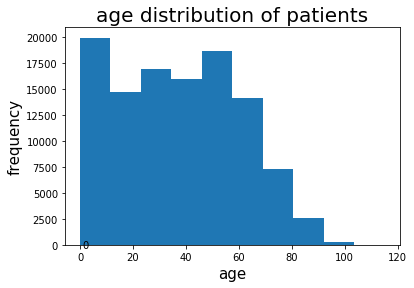

In [27]:
def histogram (x, xlabeli, ylabeli, titlei):
    x.sort_values (ascending = True).plot(kind='hist');
    plt.xlabel(xlabeli, size= 15)
    plt.ylabel(ylabeli, size= 15)
    plt.title(titlei, size= 20)
    a=x.sort_values(ascending= True)
    y=np.arange(0, 3000, 5000)
    for aa,yy in zip(a,y):
        plt.text(aa+1, yy,aa,va= 'center')
histogram(df.age, 'age', 'frequency', 'age distribution of patients')

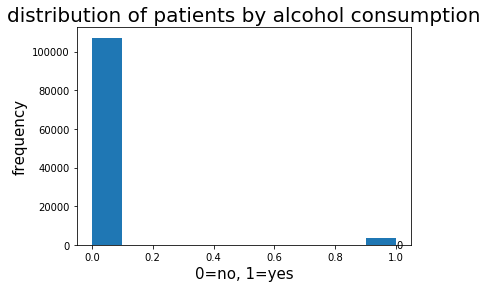

In [28]:
histogram(df.alcoholism, '0=no, 1=yes', 'frequency', 'distribution of patients by alcohol consumption')

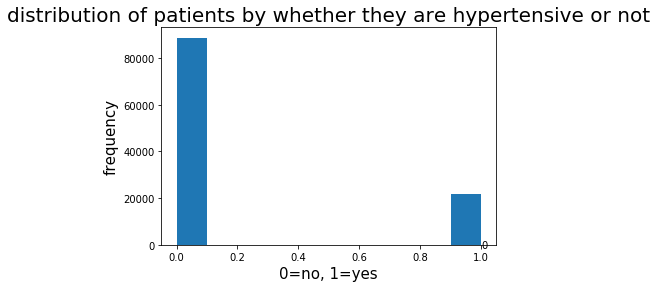

In [29]:
histogram(df.hypertension, '0=no, 1=yes', 'frequency', 'distribution of patients by whether they are hypertensive or not')

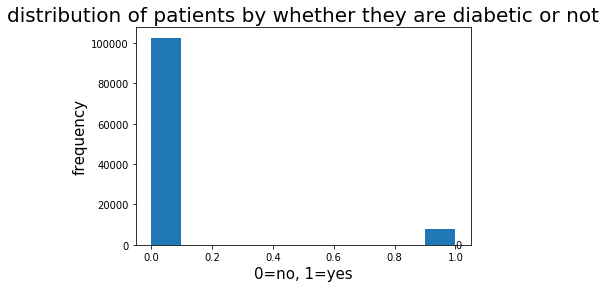

In [30]:
histogram(df.diabetes, '0=no, 1=yes', 'frequency', 'distribution of patients by whether they are diabetic or not')

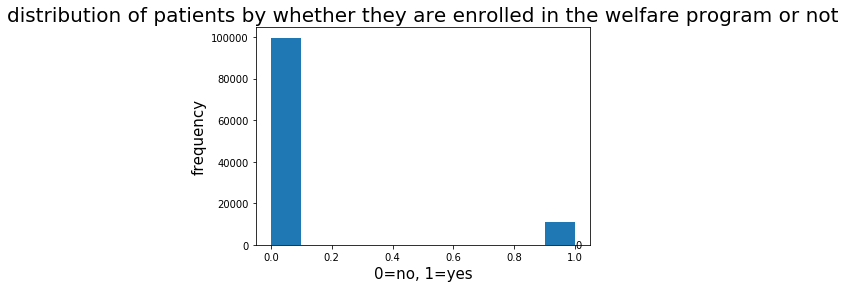

In [31]:
histogram(df.scholarship, '0=no, 1=yes', 'frequency', 'distribution of patients by whether they are enrolled in the welfare program or not')

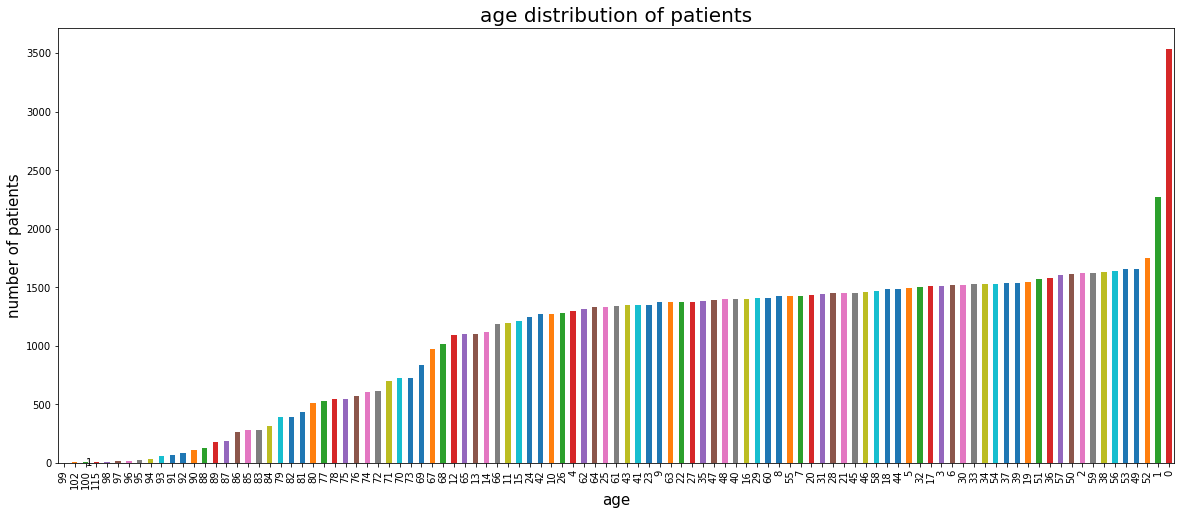

In [32]:
def barchart (x, xlabeli, ylabeli, titlei):
    x.value_counts().sort_values (ascending = True).plot(kind='bar',  figsize=(20,8));
    plt.xlabel(xlabeli, size= 15)
    plt.ylabel(ylabeli, size= 15)
    plt.title(titlei, size= 20)
    a=x.value_counts().sort_values(ascending= True)
    y=np.arange(0, 3000, 5000)
    for aa,yy in zip(a,y):
        plt.text(aa+1, yy,aa,va= 'center')
barchart(df.age, 'age', 'number of patients', 'age distribution of patients')

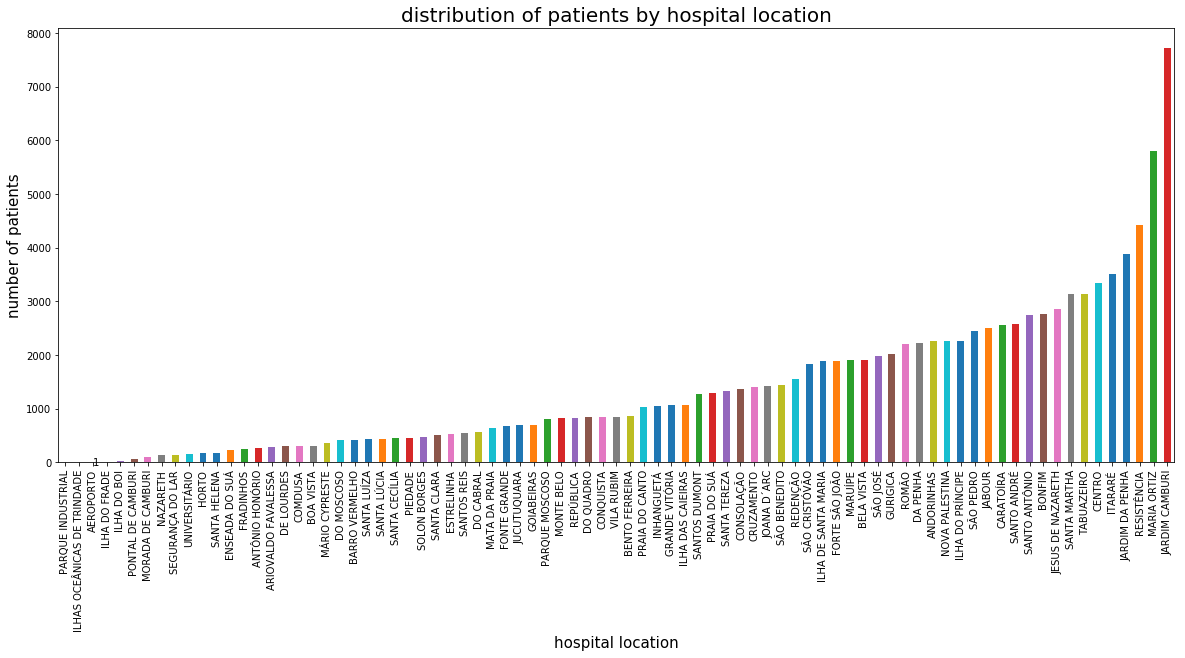

In [33]:
barchart(df.neighbourhood, 'hospital location', 'number of patients', 'distribution of patients by hospital location')

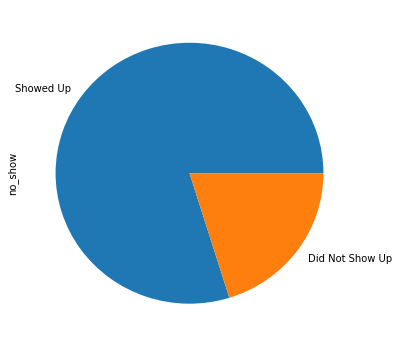

In [34]:
#pie chart showing the proportion of patients that showed up to those that did not show up
df['no_show'].value_counts().plot(kind='pie', figsize=(6,6));

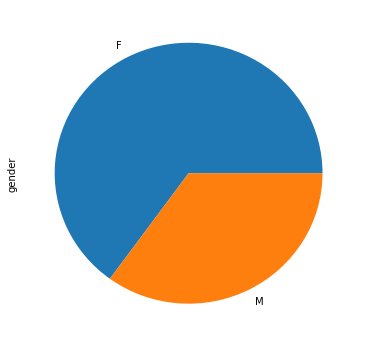

In [35]:
#pie chart showing the proportion of males to females
df['gender'].value_counts().plot(kind='pie', figsize=(6,6));

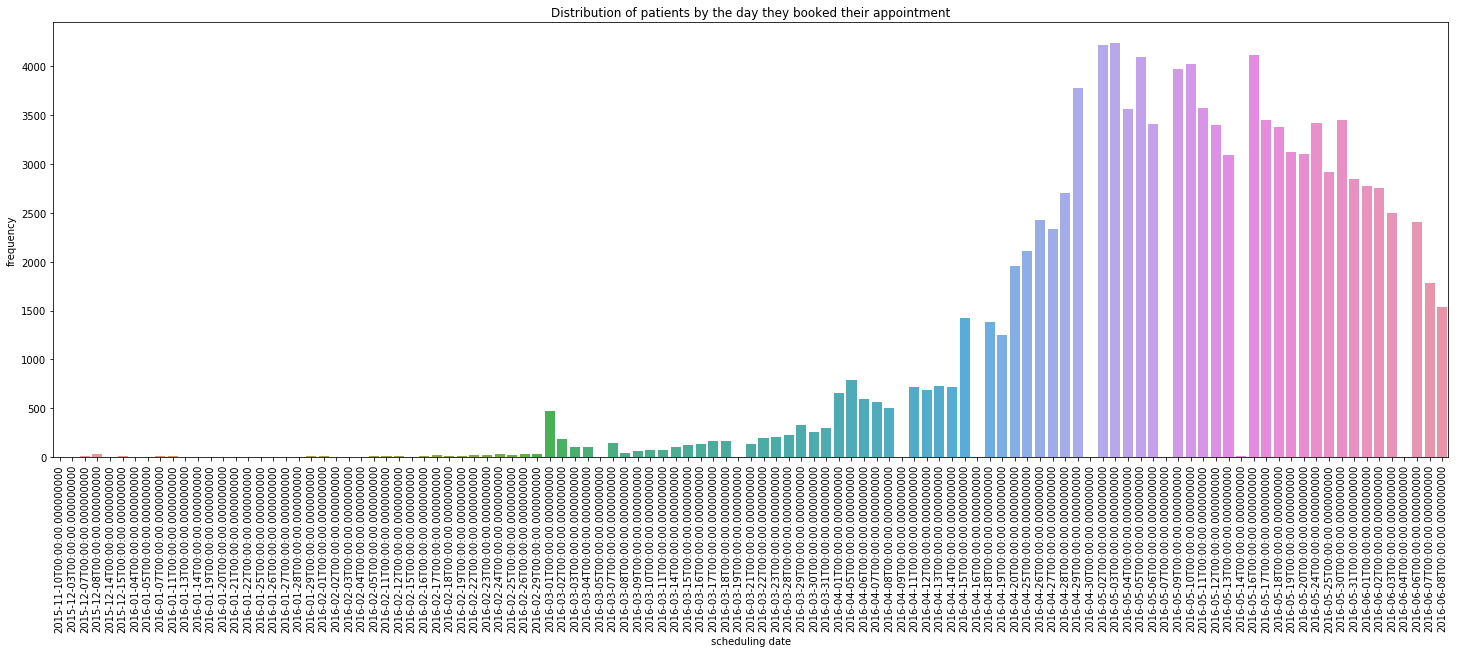

In [36]:
#distribution of patients by the day they booked their appointment
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
ax = sns.countplot(x=df['scheduled_day']);
ax.set_title("Distribution of patients by the day they booked their appointment");
plt.xlabel('scheduling date');
plt.ylabel('frequency');

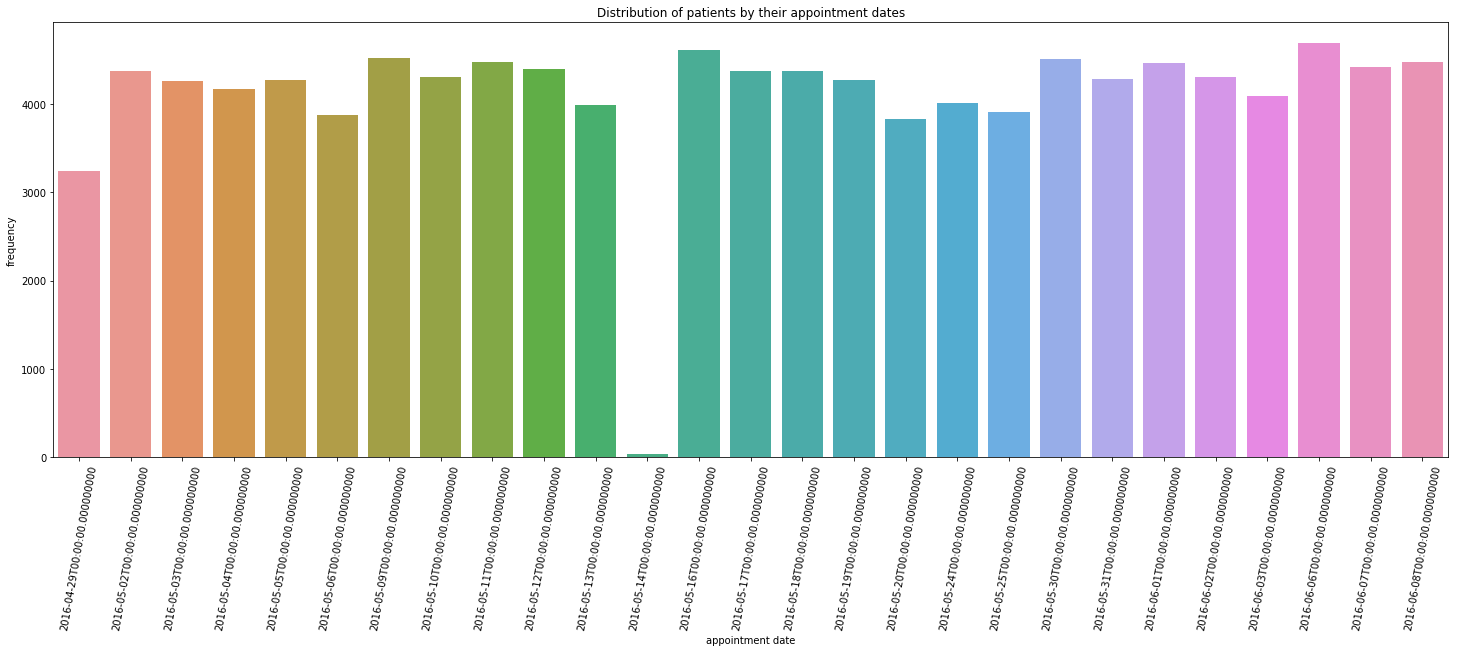

In [37]:
#distribution of patients by their appointment dates
plt.figure(figsize=(25,8))
plt.xticks(rotation=80)
ax = sns.countplot(x=df['appointment_day']);
ax.set_title("Distribution of patients by their appointment dates");
plt.xlabel('appointment date');
plt.ylabel('frequency');

    Additional Observations:
    1. 3rd May, 2016 had the highest number of patients booking appointment
    2. 6th June, 2016 was the highest booked date for appointment
    3. Most of the patients had their hospital located in JARDIM CAMBURI and the least appointed hospital location was PARQUE INDUSTRIAL
    4. Patients aged 0 had the highest number of appointments, while patients aged 99 had the lowest number of appointments

### Research Question 1 (What is the distribution of patients that showed up and did not show up for appointments based on the following factors: age, whether or not they are diabetic, gender, whether or not they are enrolled in the welfare program, whether or not they are hypertensive, hospital location, whether or not they take alcohol, whether or not they recieved sms notifications)

In [38]:
show=df.no_show=="Showed Up"
nshow=df.no_show=="Did Not Show Up"

In [ ]:
grouping = ['age', 'diabetes','gender','scholarship', 'hypertension', 'neighbourhood', 'alcoholism', 'sms_received']

fig = plt.figure(figsize=(66, 8));
for i, num in enumerate(grouping):
    ax = fig.add_subplot(3, 3, i+1);
    df.groupby([num, 'no_show'])[num].count().unstack('no_show').plot(ax=ax, kind='bar', stacked=False);

### Research Question 2  (Does waiting time between scheduling and appointment day predict whether a patient will come for appointment)

In [ ]:
df['waiting_period'] =  (df.appointment_day - df.scheduled_day).dt.days
df['waiting_period']

In [ ]:
df.waiting_period[show].hist();
plt.xlabel('Waiting Period in Days Between Scheduling and Appointment');
plt.ylabel('Frequency');
plt.title('Waiting Period of Patients Who Showed Up to Appointment');


Number of patients that showed up to their appointment reduced as waiting period increased. Therefore, a patient would most likely show up if the waiting period is short.

### Research Question 3  (What day of the week has the highest and lowest appointment show ups and the highest and lowest failed appointment show ups)

In [ ]:
df['appointment_dayofweek']=df['appointment_day'].dt.day_name()

In [ ]:
df.appointment_dayofweek[show].hist();
plt.xlabel('Day');
plt.ylabel('Frequency');
plt.title('Appointment Days of Patients Who Showed Up to their Appointment');

The highest number of appointment showups was observed among patients that had their appointments on a Wednesday, the lowest number of showups was observed among patients that had their appointments on a Thursday. No appointments were scheduled for a Saturday or Sunday. 

In [ ]:
df.appointment_dayofweek[nshow].hist();
plt.xlabel('Day');
plt.ylabel('Frequency');
plt.title('Appointment Days of Patients Who Did Not Show Up to their Appointment');

The highest number of failed appointment showups was observed among patients that had their appointments on a Tuesday, the lowest number of failed showups was observed among patients that had their appointments on a Thursday. No appointments were scheduled for a Saturday or Sunday. 

### Research Question 4  (Are they any patients who have both diabetes and hypertension? If yes, what is the age  distribution of patients that showed up and those that did not show up for appointment?)

In [ ]:
df_new=df.query('diabetes==1 and hypertension==1 and no_show=="Showed Up"')
df_new.head()
df_new.shape

In [ ]:
#age distribution of patients with diabetes and hypertension that showedup for appointment
plt.figure(figsize=(20,8))
plt.xticks(rotation=75)
ax = sns.countplot(x=df_new.age)
ax.set_title("age distribution of patients with diabetes and hypertension that showed up");
plt.xlabel('age');
plt.ylabel('frequency');

In [ ]:
df_nonew=df.query('diabetes==1 and hypertension== 1 and no_show=="Did Not Show Up"')
df_nonew.head()
df_nonew.shape

In [ ]:
#age distribution of patients with diabetes and hypertension that did not show up for appointment
plt.figure(figsize=(20,8))
plt.xticks(rotation=75)
ax = sns.countplot(x=df_nonew.age)
ax.set_title("age distribution of patients with diabetes and hypertension that did not show up");
plt.xlabel('age');
plt.ylabel('frequency ');

<a id='conclusions'></a>
## Conclusions

I have successfully cleaned and analyzed the no show medical appointment data. 

My data wrangling and cleaning process began with fixing errors in column names, then I proceeded to change data types of patient_id and schedule and appointment days to int and datetime respectively.

The original data did not have any duplicate rows or missing values. I observed that some patients booked multiple hospital appointment during the period the data was collected. I observed that an entry recorded a -1 for age, so I dropped the row using the drop() function. 

The handicap column had 5 unique values (0, 1, 2, 3, 4). What each value denotes was not communicated in any of the resources given to complete this project, therefore, i dropped the columns using the drop () function. 

During my analysis, I made the following observations:

1. 25% of patients are less than 18 years, 50% are less than 37 years, 75% are less than 55 years, and the maximum age is 115. 

2. Toddlers showed up the most for their appointment, followed by middle-aged patients, then the number of show ups declined afterwards as age increased from 58 upwards.

3. Number of patients that did not show up generally declined as age increased.

4. Generally, number of medical appointments reduced as age increased (from 59 upwards), and younger people have higher number of medical appointments.

5. Patients whose hospital is located in Jardim Camburi showed up the most to their appointment, followed by Patients whose hospital is located in Maria Ortiz. 

6. Number of patients that showed up to their appointment reduced as waiting period increased. Therefore, a patient would most likely show up if the waiting period is short.

7. The highest number of appointment showups was observed among patients that had their appointments on a Wednesday, the lowest number of showups was observed among patients that had their appointments on a Thursday. No appointments were scheduled for a Saturday or Sunday. 

8. The highest number of failed appointment showups was observed among patients that had their appointments on a Tuesday, the lowest number of failed showups was observed among patients that had their appointments on a Thursday. No appointments were scheduled for a Saturday or Sunday. 

9. 3rd May, 2016 had the highest number of patients booking appointments

10. 6th June, 2016 was the highest booked date for appointment

11. Most of the patients had their hospital located in JARDIM CAMBURI and the least appointed hospital location was PARQUE INDUSTRIAL

12. Patients aged 0 had the highest number of appointments, while patients aged 99 had the lowest number of appointments

13. Appointment scheduling started 10th, November 2015 and ended 8thJune, 2016

14. Medical appointment started on 29th April 2016, and ended 8th June 2016

15. 5345 patients had both diabetes and hypertension, and showed up to their appointment

16. 1141 patients had both diabetes and hypertension, but did not show up to their appointment

17. There are more female than male patients

18. Majority of the patients are not enrolled in the welfare program, and did not recieve sms notification

19. Majority of the patients do not have diabetes and hypertension

20. Majority of the patients donot consume alcohol

21. Histogram charts of gender, diabetes, scholarship, hypertension, alcohol, sms is not sufficient to predict their influence on whether ot not patients showed up for their appointment 


LIMITATION:
1. I could not analyze and make inferences on the handicap data because the meaning of each of its values were not clear.
2. The fact that some patients had multiple appointments, while others had fewer or just 1 appointment made it difficult to draw analyze and draw inferences on the distribution of patients.

References: https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/
https://stackoverflow.com/questions/36786722/how-to-display-full-output-in-jupyter-not-only-last-result
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])